## Siddhartha Bhaskaran-CB.EN.U4CSE20260
## A. Pandas

### Question 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
recipes = pd.read_json('recipeitems-latest.json', lines=True)

In [ ]:
# Indexing
recipes.iloc[69]

_id                                {'$oid': '516075fd96cc6208ba280488'}
name                                            Gingery Rhubarb Compote
ingredients           1 (packed) light brown sugar\n1/2 golden raisi...
url                   http://www.bonappetit.com/recipes/2013/04/ging...
image                 http://www.bonappetit.com/images/magazine/2013...
ts                                             {'$date': 1365276157088}
cookTime                                                            NaN
source                                                       bonappetit
recipeYield                                                  6 servings
datePublished                                                2013-04-01
prepTime                                                            NaN
description           Rhubarb's natural tartness is balanced by the ...
totalTime                                                           NaN
creator                                                         

In [ ]:
recipes.description.str.contains('jam').sum()

926

In [ ]:
recipes.ingredients.str.len().describe()

count    174602.000000
mean        244.846835
std         146.980388
min           0.000000
25%         148.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [ ]:
recipe = recipes.name[np.argmin(recipes.ingredients.str.len())]
print("Recipe with least no. of ingredients:", recipe)

Recipe with least no. of ingredients: Filled Meringue Coffee Cake


In [ ]:
# Missing value manipulation
recipes.isnull().sum()

_id                        0
name                       0
ingredients                0
url                        0
image                  16324
ts                         0
cookTime               56666
source                     0
recipeYield             7756
datePublished          96492
prepTime               43396
description            15210
totalTime             173032
creator               174207
recipeCategory        174214
dateModified          174441
recipeInstructions    174598
dtype: int64

In [ ]:
recipes['description'].fillna("Description not available", inplace=True)
recipes['datePublished'].fillna('1970-01-01', inplace=True)
recipes['recipeCategory'].fillna("Category not available", inplace=True)
recipes['creator'].fillna("Unknown Creator", inplace=True)

recipes.isnull().sum()

_id                        0
name                       0
ingredients                0
url                        0
image                  16324
ts                         0
cookTime               56666
source                     0
recipeYield             7756
datePublished              0
prepTime               43396
description                0
totalTime             173032
creator                    0
recipeCategory             0
dateModified          174441
recipeInstructions    174598
dtype: int64

In [ ]:
# Concat or append
dataframe_1 = recipes[0:5]
dataframe_2 = recipes[5:10]

print("dataframe1's shape: ",dataframe_1.shape)
print("dataframe2's shape: ",dataframe_2.shape)

dataframe1's shape:  (5, 17)
dataframe2's shape:  (5, 17)


In [ ]:
dataframe_3 = pd.concat([dataframe_1, dataframe_2], axis=0)
print("dataframe3's shape: ",dataframe_3.shape)

dataframe3's shape:  (10, 17)


In [ ]:
# Merge
dataframe_1.pop('_id')
dataframe_1.pop('ts')

dataframe_2.pop('_id')
dataframe_2.pop('ts')

dataframe_4 = pd.merge(
    dataframe_1,
    dataframe_2,
    how="outer",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
dataframe_4.shape

(10, 15)

In [ ]:
dataframe_4

,name,ingredients,url,image,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,Unknown Creator,Category not available,NaN,NaN
1,Eggs in Hash Brown Nests,6 whole Medium Russet Potatoes (6 To 8)\n Salt...,http://thepioneerwoman.com/cooking/2013/03/egg...,http://static.thepioneerwoman.com/cooking/file...,PT1H30M,thepioneerwoman,12,2013-03-26,PT15M,These are the perfect little side dish for Eas...,NaN,Unknown Creator,Category not available,NaN,NaN
2,Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,Unknown Creator,Category not available,NaN,NaN
3,Krispy Easter Eggs,4 Tablespoons Butter\n1 package (10 Ounces) Mi...,http://thepioneerwoman.com/cooking/2013/03/kri...,http://static.thepioneerwoman.com/cooking/file...,PT5M,thepioneerwoman,12,2013-03-25,PT20M,Imagine the Easter Bunny laying an egg. Wa...,NaN,Unknown Creator,Category not available,NaN,NaN
4,Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,NaN,Unknown Creator,Category not available,NaN,NaN
5,Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,Unknown Creator,Category not available,NaN,NaN
6,Pistachio Chocolate Chip Muffins,1½ cups whole wheat pastry flour\n1¾ cup roast...,http://naturallyella.com/2013/03/20/pistachio-...,http://cdn.naturallyella.com/files/2013/03/IMG...,PT20M,naturallyella,12,2013-03-20T07:42:13+00:00,PT10M,These muffins are inspired by a new favorite s...,PT30M,Erin Alderson,Snack,NaN,NaN
7,Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,NaN,Unknown Creator,Category not available,NaN,NaN
8,Spinach and Kamut Salad with Chili-Orange Dres...,"3-4 handfuls spinach\n½ cup kamut, uncooked\n¼...",http://naturallyella.com/2013/03/18/spinach-an...,http://cdn.naturallyella.com/files/2013/03/IMG...,PT60M,naturallyella,2,2013-03-18T07:36:07+00:00,PT15M,"Recently, there have been moments that catch m...",PT1H15M,Erin Alderson,Salad,NaN,NaN
9,Za'atar,"4 tablespoons fresh thyme leaves, stripped fro...",http://www.101cookbooks.com/archives/zaatar-re...,http://www.101cookbooks.com/mt-static/images/f...,PT10M,101cookbooks,NaN,2013-01-27,PT5M,Za'atar is an incredibly versatile Middle East...,NaN,Unknown Creator,Category not available,NaN,NaN


In [ ]:
# Join
dataframe_5 = pd.concat([dataframe_1, dataframe_2], axis=1, join="outer")
dataframe_5.shape

(10, 30)

In [ ]:
dataframe_5

,name,ingredients,url,image,cookTime,source,recipeYield,datePublished,prepTime,description,...,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mixed Berry Shortcake,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/mix...,http://static.thepioneerwoman.com/cooking/file...,PT15M,thepioneerwoman,8,2013-03-18,PT15M,It's Monday! It's a brand new week! The birds ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pomegranate Yogurt Bowl,For each bowl: \na big dollop of Greek yogurt\...,http://www.101cookbooks.com/archives/pomegrana...,http://www.101cookbooks.com/mt-static/images/f...,NaN,101cookbooks,Serves 1.,2013-01-20,PT5M,A simple breakfast bowl made with Greek yogurt...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,thepioneerwoman,12,2013-03-25,PT20M,Imagine the Easter Bunny laying an egg. Wa...,NaN,Unknown Creator,Category not available,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,naturallyella,2,2013-03-18T07:36:07+00:00,PT15M,"Recently, there have been moments that catch m...",PT1H15M,Erin Alderson,Salad,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,thepioneerwoman,12,2013-03-26,PT15M,These are the perfect little side dish for Eas...,NaN,Unknown Creator,Category not available,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101cookbooks,NaN,2013-01-27,PT5M,Za'atar is an incredibly versatile Middle East...,NaN,Unknown Creator,Category not available,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,naturallyella,12,2013-03-20T07:42:13+00:00,PT10M,These muffins are inspired by a new favorite s...,PT30M,Erin Alderson,Snack,NaN,NaN


In [ ]:
# Aggregation
dataframe_6 = dataframe_1.drop(labels=['cookTime','recipeYield'], axis=1)
dataframe_6.agg(['sum', 'min'])

,name,ingredients,url,image,source,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
sum,Drop Biscuits and Sausage GravyHot Roast Beef ...,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,thepioneerwomanthepioneerwoman101cookbooksthep...,2013-03-112013-03-132013-01-072013-03-182013-0...,PT10MPT20MPT15MPT15MPT5M,"Late Saturday afternoon, after Marlboro Man ha...",0.0,Unknown CreatorUnknown CreatorUnknown CreatorU...,Category not availableCategory not availableCa...,0.0,0.0
min,Drop Biscuits and Sausage Gravy,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,101cookbooks,2013-01-07,PT10M,A beauty of a carrot salad - tricked out with ...,NaN,Unknown Creator,Category not available,NaN,NaN


In [ ]:
dataframe_6.agg('mean', axis="columns")

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


Series([], dtype: float64)

In [ ]:
# Grouping
dataframe_g = recipes.groupby(recipes['creator'])

In [ ]:
# Apply
recipes['recipeYield'].fillna("0", inplace=True)
def min1(x): 
    try: return int(x)
    except: return 1
dataframe_a = recipes['recipeYield'].apply(min1)

In [ ]:
# Transform
dataframe_t = recipes['recipeYield'].transform(lambda x: 'Serves ' + x)

In [ ]:
recipes.head(3)

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,Unknown Creator,Category not available,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,Unknown Creator,Category not available,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,0,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,Unknown Creator,Category not available,NaN,NaN


In [ ]:
# Pivot table
display(pd.pivot_table(recipes, index=['recipeYield', 'cookTime']))

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


Empty DataFrame
Columns: []
Index: [(, PT0M), (, PT15M), (, PT1H), (, PT30M), (, PT4H), (, PT7M), ((1 cake), PT30S), ((1 cake), PT50S), ((1 cup pesto), P0D), ((1 cup syrup), PT2M), ((1 dozen), PT13M), ((1 drink), P0D), ((1 large latte), PT2M), ((1 large pizza), PT15M), ((1 loaf), PT25M), ((1 mask), P0D), ((1 pie), PT15M), ((1 pitcher), P0D), ((1 pound shrimp), PT3M), ((1 quart), P0D), ((1 quart), PT10M), ((1 quart), PT20M), ((1 serving), P0D), ((1 serving), PT10M), ((1 serving), PT15M), ((1 serving), PT40S), ((1 smoothie), P0D), ((1-2 servings), PT45S), ((1-9 inch cheesecake), PT7M), ((10 servings), PT2H), ((10 servings), PT45M), ((10-1/2 cup servings), PT20M), ((12 bites), P0D), ((12 cookies), PT10M), ((12 dinner-sized bites or 30 ap), PT30M), ((12 eggs), P0D), ((12 pops), P0D), ((12 sandwiches), PT15M), ((12 servings (1/2 cup dip per s), PT30M), ((12 servings), P0D), ((12 servings), PT45M), ((12 slices (extra large pizza)), PT15M), ((12 slices), PT20M), ((12 slices), PT40M), ((12 sliders), PT20M), ((12 tortillas), PT30M), ((12 whoopie pies), PT15M), ((16 meatballs), PT15M), ((16 servings), PT30M), ((18 balls), P0D), ((18 cookies), PT10M), ((2 1/2 cups almonds), PT10M), ((2 boats), PT10M), ((2 cakes), PT10M), ((2 cups), P0D), ((2 cups), PT15M), ((2 dozen cookies), PT15M), ((2 dozen cookies), PT7M), ((2 dozen marshmallows), PT10M), ((2 dozen), PT30M), ((2 large mugs), PT3M), ((2 lunch-sized salads), P0D), ((2 sandwiches), PT10M), ((2 servings), P0D), ((2 servings), PT10M), ((2 servings), PT15M), ((2 servings), PT20M), ((2 servings), PT2M), ((2 servings), PT3M), ((2 servings), PT5M), ((2 shakes), P0D), ((2 stuffed trout), PT20M), ((2-3 drinks), PT5M), ((2-4 servings), P0D), ((20 burritos), PT10M), ((20 cookies), PT10M), ((24 bars), PT10M), ((24 candies), PT10M), ((24 pieces), PT15M), ((24 squares), PT45M), ((3 cups), PT10M), ((3 dozen pancakes), PT10M), ((3 dozen treats), PT30M), ((30 servings), PT4H), ((36 bite-sized pies), PT20M), ((4 burgers), PT10M), ((4 cups), PT15M), ((4 cups), PT45M), ((4 dozen cookies, serving size), PT10M), ((4 dozen mini quiche), PT15M), ((4 dozen), PT13M), ((4 individual pizzas), PT10M), ((4 s'mores), PT5M), ((4 sandwiches), PT15M), ((4 sandwiches), PT20M), ((4 servings (2 cups per serving), PT10M), ((4 servings), P0D), ((4 servings), PT10M), ((4 servings), PT15M), ((4 servings), PT1H30M), ...]

[12894 rows x 0 columns]

## Time Series
### Question 2
#### Seattle Bicycle Counts

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [ ]:
# Index by time
bicycles = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
bicycles.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [ ]:
%matplotlib inline

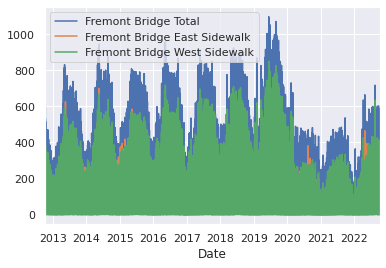

In [ ]:
bicycles.plot()

Text(0, 0.5, 'Weekly bicycle count')

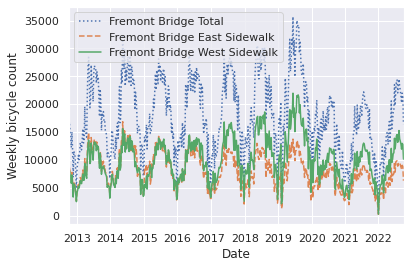

In [ ]:
# Resampling
weekly = bicycles.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

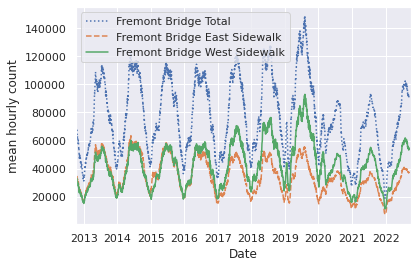

In [ ]:
daily = bicycles.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

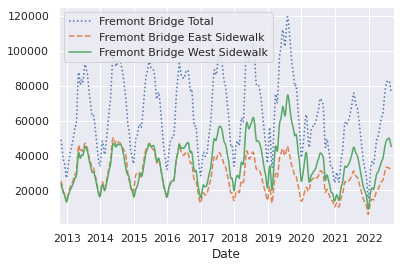

In [ ]:
# Rolling windows
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

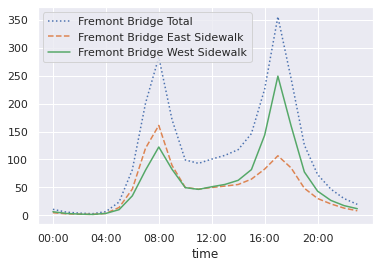

In [ ]:
# Data Visualization
by_time = bicycles.groupby(bicycles.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

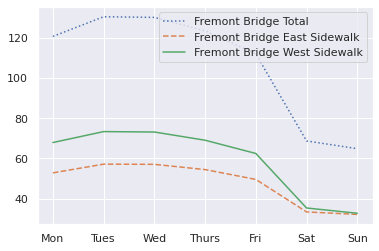

In [ ]:
by_weekday = bicycles.groupby(bicycles.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [ ]:
# Time-shifts
bicycles.shift(1000, axis=0)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
...,...,...,...
2022-09-30 19:00:00,3.0,1.0,2.0
2022-09-30 20:00:00,5.0,1.0,4.0
2022-09-30 21:00:00,5.0,3.0,2.0


In [ ]:
bicycles.tshift(-1000, axis=0)

<ipython-input-150-2f8b1246c931>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  bicycles.tshift(-1000, axis=0)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-08-22 08:00:00,13.0,4.0,9.0
2012-08-22 09:00:00,10.0,4.0,6.0
2012-08-22 10:00:00,2.0,1.0,1.0
2012-08-22 11:00:00,5.0,2.0,3.0
2012-08-22 12:00:00,7.0,6.0,1.0
...,...,...,...
2022-08-20 03:00:00,168.0,57.0,111.0
2022-08-20 04:00:00,73.0,33.0,40.0
2022-08-20 05:00:00,69.0,30.0,39.0


In [ ]:
bicycles.shift(2, axis=1)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,NaN,NaN,13.0
2012-10-03 01:00:00,NaN,NaN,10.0
2012-10-03 02:00:00,NaN,NaN,2.0
2012-10-03 03:00:00,NaN,NaN,5.0
2012-10-03 04:00:00,NaN,NaN,7.0
...,...,...,...
2022-09-30 19:00:00,NaN,NaN,168.0
2022-09-30 20:00:00,NaN,NaN,73.0
2022-09-30 21:00:00,NaN,NaN,69.0


## Time Series
### Question 3
#### Stock PX

In [ ]:
close_px = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [ ]:
# Subsetting
close_px_spec = close_px[['AAPL', 'MSFT', 'XOM']]
close_px_spec.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [ ]:
# Indexing
close_px_spec.iloc[8]

AAPL    8.06
MSFT    0.52
XOM     6.23
Name: 1990-02-13 00:00:00, dtype: float64

In [ ]:
close_px_spec.loc['1990-02-01']

AAPL    7.86
MSFT    0.51
XOM     6.12
Name: 1990-02-01 00:00:00, dtype: float64

In [ ]:
# Selection
stocks_1990 = close_px_spec.loc['1990-01-01':'1990-12-31']
stocks_1990

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
...,...,...,...
1990-12-24,10.40,0.82,7.02
1990-12-26,10.35,0.82,7.09
1990-12-27,10.29,0.82,7.02
1990-12-28,10.17,0.82,7.07


In [ ]:
# Date ranges
r = pd.date_range(start='1/1/1990', end='6/1/1990')
print(r)
for date in r:
    try: print(stocks_1990.loc[str(date).split()[0]])
    except: continue

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '1990-05-23', '1990-05-24', '1990-05-25', '1990-05-26',
               '1990-05-27', '1990-05-28', '1990-05-29', '1990-05-30',
               '1990-05-31', '1990-06-01'],
              dtype='datetime64[ns]', length=152, freq='D')
AAPL    7.86
MSFT    0.51
XOM     6.12
Name: 1990-02-01 00:00:00, dtype: float64
AAPL    8.00
MSFT    0.51
XOM     6.24
Name: 1990-02-02 00:00:00, dtype: float64
AAPL    8.18
MSFT    0.51
XOM     6.25
Name: 1990-02-05 00:00:00, dtype: float64
AAPL    8.12
MSFT    0.51
XOM     6.23
Name: 1990-02-06 00:00:00, dtype: float64
AAPL    7.77
MSFT    0.51
XOM     6.33
Name: 1990-02-07 00:00:00, dtype: float64
AAPL    7.71
MSFT    0.51
XOM     6.35
Name: 1990-02-08 00:00:00, dtype: float64
AAPL    8.00
MSFT    0.52
XOM     6.37
Name: 1990-02-09 00:00:00

In [ ]:
# Frequencies
r = pd.date_range(start='1/1/1990', end='6/1/1990', freq='M')
print(r)
for date in r:
    try: print(stocks_1990.loc[str(date).split()[0]])
    except: continue

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31'],
              dtype='datetime64[ns]', freq='M')
AAPL    7.97
MSFT    0.54
XOM     6.20
Name: 1990-02-28 00:00:00, dtype: float64
AAPL    9.23
MSFT    0.63
XOM     5.97
Name: 1990-04-30 00:00:00, dtype: float64
AAPL    9.69
MSFT    0.80
XOM     6.42
Name: 1990-05-31 00:00:00, dtype: float64


In [ ]:
stocks_1990.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [ ]:
# Lagging shift
stocks_1990.shift(2)

,AAPL,MSFT,XOM
1990-02-01,NaN,NaN,NaN
1990-02-02,NaN,NaN,NaN
1990-02-05,7.86,0.51,6.12
1990-02-06,8.00,0.51,6.24
1990-02-07,8.18,0.51,6.25
...,...,...,...
1990-12-24,10.40,0.82,6.90
1990-12-26,10.64,0.83,6.95
1990-12-27,10.40,0.82,7.02
1990-12-28,10.35,0.82,7.09


In [ ]:
# Leading shift
stocks_1990.shift(-2)

,AAPL,MSFT,XOM
1990-02-01,8.18,0.51,6.25
1990-02-02,8.12,0.51,6.23
1990-02-05,7.77,0.51,6.33
1990-02-06,7.71,0.51,6.35
1990-02-07,8.00,0.52,6.37
...,...,...,...
1990-12-24,10.29,0.82,7.02
1990-12-26,10.17,0.82,7.07
1990-12-27,10.17,0.82,7.09
1990-12-28,NaN,NaN,NaN


In [ ]:
# Time zone localization and conversion
stocks_ew = stocks_1990.tz_localize('Europe/Warsaw')

In [ ]:
stocks_ew.tz_convert('US/Eastern')

,AAPL,MSFT,XOM
1990-01-31 18:00:00-05:00,7.86,0.51,6.12
1990-02-01 18:00:00-05:00,8.00,0.51,6.24
1990-02-04 18:00:00-05:00,8.18,0.51,6.25
1990-02-05 18:00:00-05:00,8.12,0.51,6.23
1990-02-06 18:00:00-05:00,7.77,0.51,6.33
...,...,...,...
1990-12-23 18:00:00-05:00,10.40,0.82,7.02
1990-12-25 18:00:00-05:00,10.35,0.82,7.09
1990-12-26 18:00:00-05:00,10.29,0.82,7.02
1990-12-27 18:00:00-05:00,10.17,0.82,7.07


In [ ]:
stocks_ew

,AAPL,MSFT,XOM
1990-02-01 00:00:00+01:00,7.86,0.51,6.12
1990-02-02 00:00:00+01:00,8.00,0.51,6.24
1990-02-05 00:00:00+01:00,8.18,0.51,6.25
1990-02-06 00:00:00+01:00,8.12,0.51,6.23
1990-02-07 00:00:00+01:00,7.77,0.51,6.33
...,...,...,...
1990-12-24 00:00:00+01:00,10.40,0.82,7.02
1990-12-26 00:00:00+01:00,10.35,0.82,7.09
1990-12-27 00:00:00+01:00,10.29,0.82,7.02
1990-12-28 00:00:00+01:00,10.17,0.82,7.07


In [ ]:
# Periods and period arithmetic
sample = stocks_1990.sample()
date = sample.index

In [ ]:
date.day_of_week

Int64Index([2], dtype='int64')

In [ ]:
date.day_of_year

Int64Index([52], dtype='int64')

In [ ]:
date.day

Int64Index([21], dtype='int64')

In [ ]:
date

DatetimeIndex(['1990-02-21'], dtype='datetime64[ns]', freq=None)

In [ ]:
two_weeks = pd.Timedelta(days=14)
date - two_weeks

DatetimeIndex(['1990-02-07'], dtype='datetime64[ns]', freq=None)

In [ ]:
date + two_weeks

DatetimeIndex(['1990-03-07'], dtype='datetime64[ns]', freq=None)

In [ ]:
date + 2 * two_weeks

DatetimeIndex(['1990-03-21'], dtype='datetime64[ns]', freq=None)

In [ ]:
two_hours = pd.Timedelta(hours=2)
date - two_hours

DatetimeIndex(['1990-02-20 22:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
date + 32 * two_hours

DatetimeIndex(['1990-02-23 16:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
date + two_hours / 2

DatetimeIndex(['1990-02-21 01:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
# Period frequency conversion
sample = stocks_1990.sample()
date = sample.index
date

DatetimeIndex(['1990-11-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
period = pd.Period(date.date[0], freq='H')
period

Period('1990-11-01 00:00', 'H')

In [ ]:
period.asfreq('Y')

Period('1990', 'A-DEC')

In [ ]:
# Resampling and frequency conversion
stocks_1990_pd = stocks_1990.resample('1D')

In [ ]:
stocks_1990.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [ ]:
# Upsampling and filling values
stocks_1990_us = stocks_1990.resample('1D').ffill()
stocks_1990_us.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-03,8.00,0.51,6.24
1990-02-04,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25


In [ ]:
# Downsampling with aggregated sum
stocks_1990_ds = stocks_1990.resample('3D').sum()
stocks_1990_ds.head()

,AAPL,MSFT,XOM
1990-02-01,15.86,1.02,12.36
1990-02-04,16.30,1.02,12.48
1990-02-07,23.48,1.54,19.05
1990-02-10,7.94,0.52,6.22
1990-02-13,24.06,1.57,18.83


In [ ]:
# Moving window functions
roll = stocks_1990_ds.rolling(3)

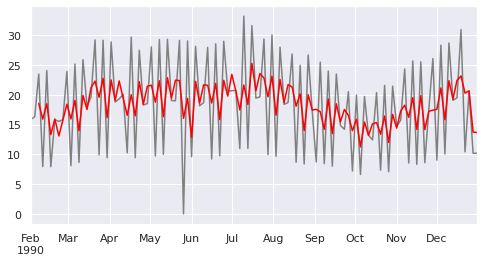

In [ ]:
stocks_1990_ds["AAPL"].plot(color="grey", figsize=(8,4))
roll.mean()["AAPL"].plot(color="red")

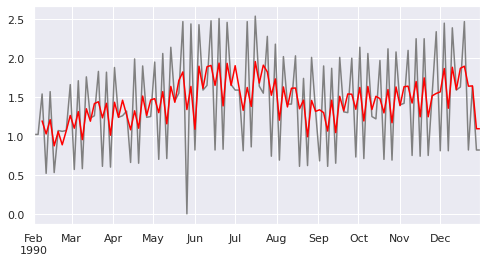

In [ ]:
stocks_1990_ds["MSFT"].plot(color="grey", figsize=(8,4))
roll.mean()["MSFT"].plot(color="red")

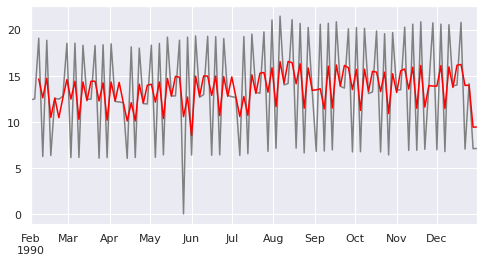

In [ ]:
stocks_1990_ds["XOM"].plot(color="grey", figsize=(8,4))
roll.mean()["XOM"].plot(color="red")

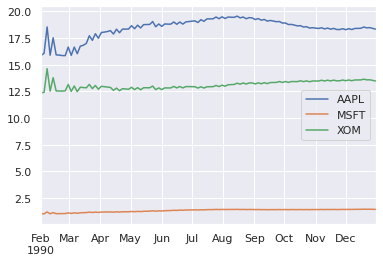

In [ ]:
stocks_1990_ds.expanding(min_periods=1).mean().plot()

In [ ]:
# Exponentially Weighted Functions
stocks_1990_ds['MSFTE'] = stocks_1990_ds['MSFT'].ewm(span=5).mean()
stocks_1990_ds.head()

,AAPL,MSFT,XOM,MSFTE
1990-02-01,15.86,1.02,12.36,1.020000
1990-02-04,16.30,1.02,12.48,1.020000
1990-02-07,23.48,1.54,19.05,1.266316
1990-02-10,7.94,0.52,6.22,0.956308
1990-02-13,24.06,1.57,18.83,1.191896


## Classifier
### Question 4
#### Chronic Kidney Disease (CKD)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('ckd.csv')
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [ ]:
X = df[['Hemoglobin', 'Blood Glucose Random']]
y = df['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns=["Hemoglobin", 'Glucose'])
X.head()

,Hemoglobin,Glucose
0,-0.865744,-0.221549
1,-1.457446,-0.947597
2,-1.004968,3.841231
3,-2.814879,0.396364
4,-2.083954,0.643529


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

scores = list()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9791666666666666

In [ ]:
alice = pd.DataFrame([[0, 1.1]], columns=['Hemoglobin', 'Glucose'])
alice
knn.predict(alice)

array([1])

Class is 1 meaning that Alice is likely to have CKD.

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9791666666666666

In [ ]:
naive_bayes.predict(alice)

array([1])

Class is 1 meaning that Alice is likely to have CKD.

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=6)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

1.0

In [ ]:
random_forest.predict(alice)

array([1])

Class is 1 meaning that Alice is likely to have CKD.

### Question 5
#### Wine

In [ ]:
df = pd.read_csv('wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X.shape

(178, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Naive Bayes

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9166666666666666

In [ ]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9444444444444444

In [ ]:
# Random Forest classifier

random_forest = RandomForestClassifier(n_estimators=6)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8611111111111112

In [ ]:
# K Nearest Neighbors

nn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8055555555555556

## Regression
### Question 7
#### Home Prices

In [ ]:
df = pd.read_csv('house.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
columns = ['SalePrice', '1st Flr SF', '2nd Flr SF',
           'Total Bsmt SF', 'Garage Area',
           'Wood Deck SF', 'Open Porch SF', 'Lot Area',
           'Year Built', 'Yr Sold']
df_n = df[columns][df['Bldg Type'] == '1Fam'][df['Sale Condition'] == 'Normal']
df_n.sort_values("SalePrice", inplace=True)

<ipython-input-207-8fea1dcdef97>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df[columns][df['Bldg Type'] == '1Fam'][df['Sale Condition'] == 'Normal']


In [ ]:
df_n.head()

,SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
2843,35000,498,0,498.0,216.0,0,0,8088,1922,2006
1901,39300,334,0,0.0,0.0,0,0,5000,1946,2007
1555,40000,649,668,649.0,250.0,0,54,8500,1920,2008
708,45000,612,0,0.0,308.0,0,0,5925,1940,2009
1220,52000,729,0,270.0,0.0,0,0,4130,1935,2008


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadf49099a0>]],
      dtype=object)

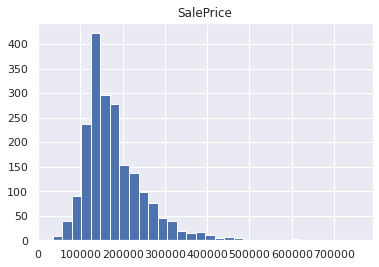

In [ ]:
df_n.hist('SalePrice', bins=32)

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_n.drop(['SalePrice'], axis=1)
y = df_n['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 22419.0357861199
MSE: 959700620.1280022
RMSE: 30979.035171031428
R-Squared: 0.8058875324251065


In [ ]:
df_n.columns

Index(['SalePrice', '1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold'],
      dtype='object')

In [ ]:
columns = ['SalePrice', 'FstFlrSF', 'SndFlrSF', 'TotalBsmtSF', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'YearBuilt', 'YrSold']
df_n.columns = columns

In [ ]:
df_n.head()

,SalePrice,FstFlrSF,SndFlrSF,TotalBsmtSF,GarageArea,WoodDeckSF,OpenPorchSF,LotArea,YearBuilt,YrSold
2843,35000,498,0,498.0,216.0,0,0,8088,1922,2006
1901,39300,334,0,0.0,0.0,0,0,5000,1946,2007
1555,40000,649,668,649.0,250.0,0,54,8500,1920,2008
708,45000,612,0,0.0,308.0,0,0,5925,1940,2009
1220,52000,729,0,270.0,0.0,0,0,4130,1935,2008


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SalePrice ~ FstFlrSF + SndFlrSF + TotalBsmtSF + GarageArea + WoodDeckSF + OpenPorchSF + LotArea + YearBuilt + YrSold', data=df_n).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1014.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:49:01   Log-Likelihood:                -23547.
No. Observations:                2002   AIC:                         4.711e+04
Df Residuals:                    1992   BIC:                         4.717e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.766e+05   1.08e+06     -0.809      0.418      -3e+06    1.25e+06
FstFlrSF       76.2052      3.262     23.359      0.000      69.807      82.603
SndFlrSF       75.4244      1.856     40.630      0.000      71.784      79.065
TotalBsmtSF    48.3956      2.843     17.025      0.000      42.821      53.971
GarageArea     49.3069      4.458     11.059      0.000      40.563      58.051
WoodDeckSF     32.6160      5.545      5.882      0.000      21.742      43.490
OpenPorchSF    20.2709     11.593      1.749      0.081      -2.464      43.006
LotArea         0.5439      0.094      5.792      0.000       0.360       0.728
YearBuilt     514.0728     28.216     18.219      0.000     458.737     569.408
YrSold        -75.6764    539.439     -0.140      0.888   -1133.600     982.247
==============================================================================
Omnibus:                      710.794   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6598.136
Skew:                           1.400   Prob(JB):                         0.00
Kurtosis:                      11.442   Cond. No.                     2.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

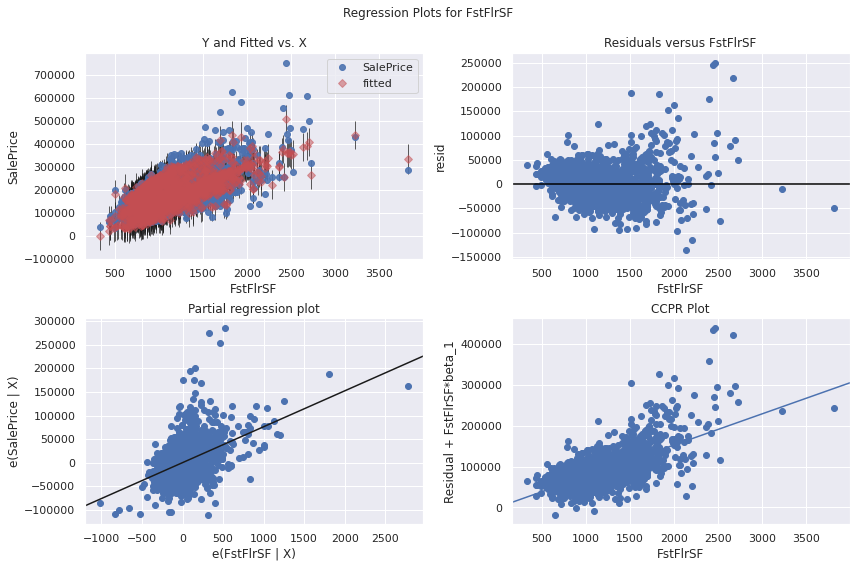

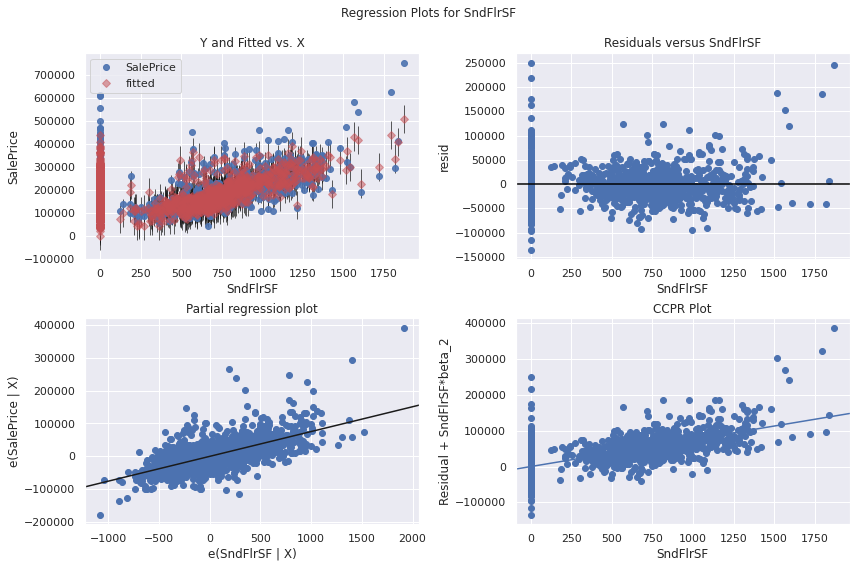

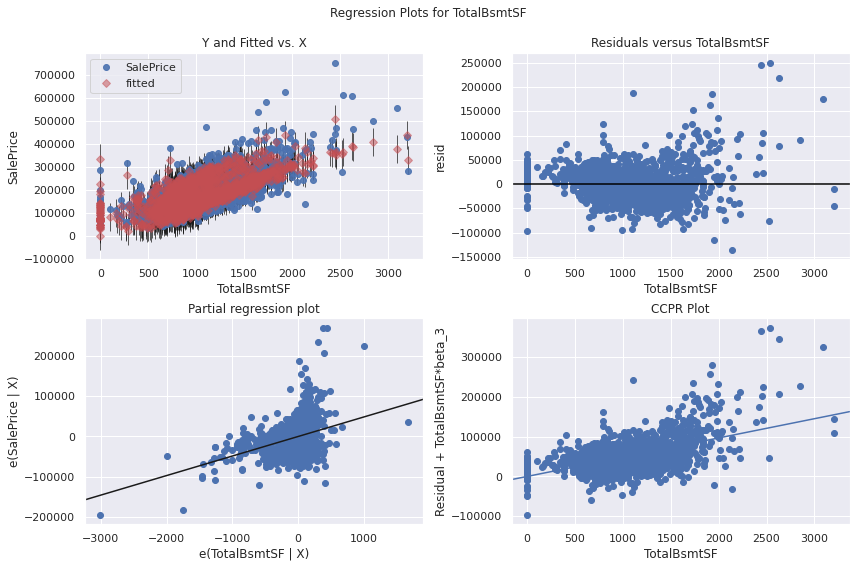

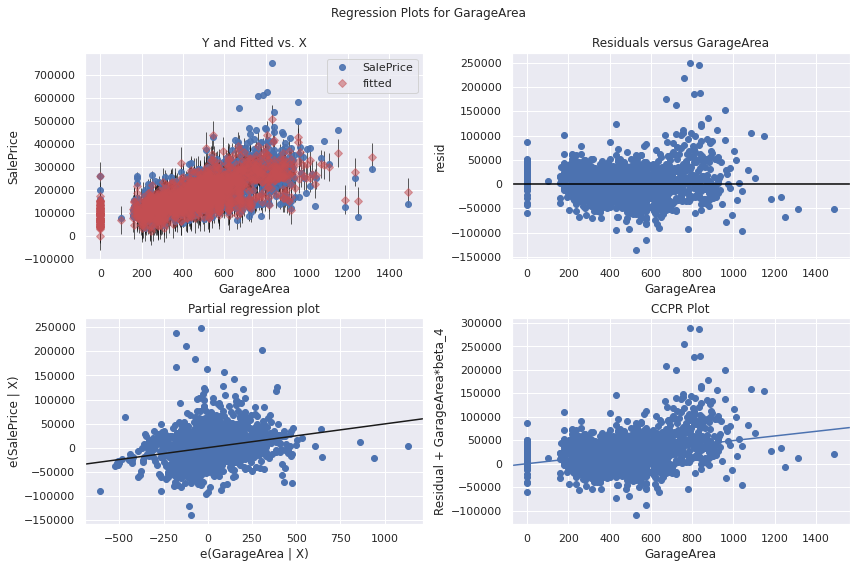

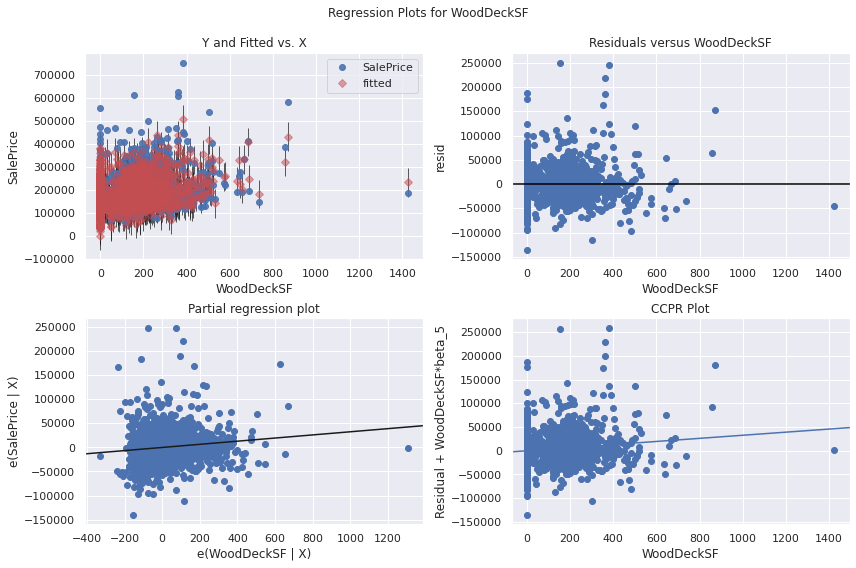

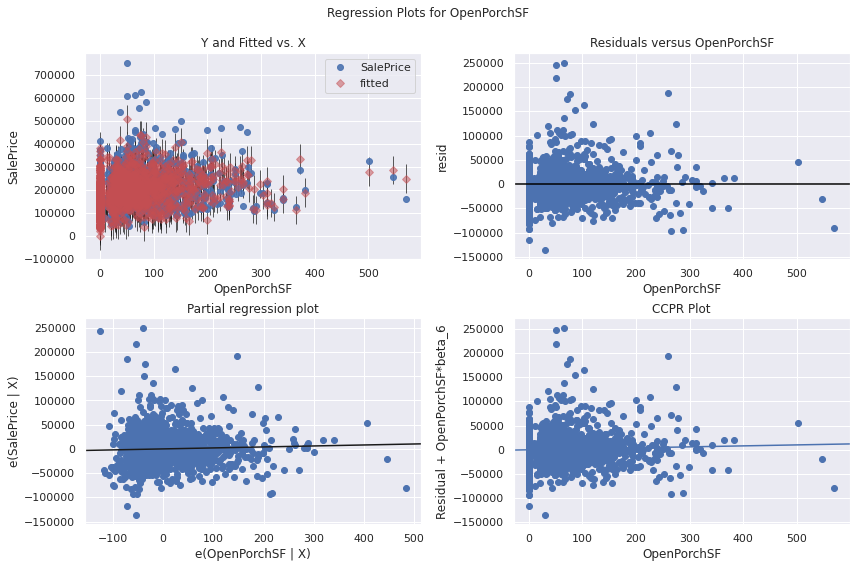

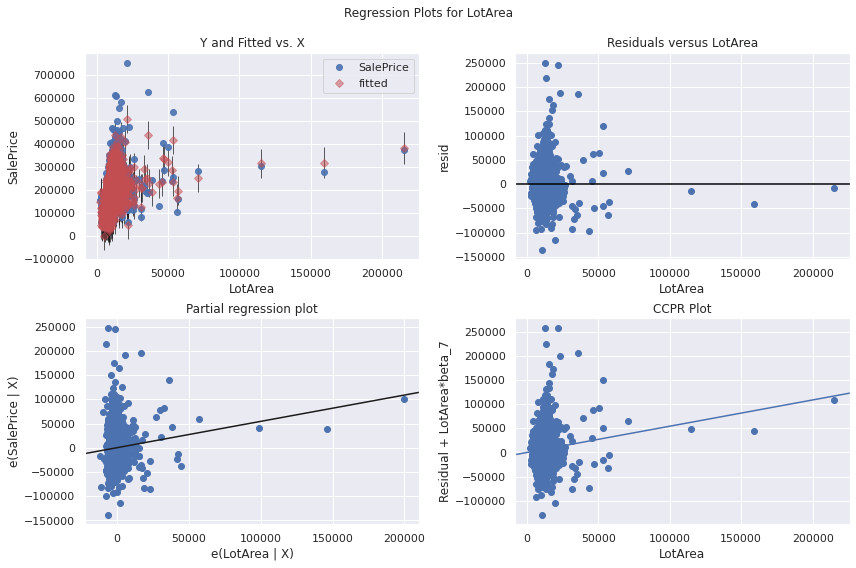

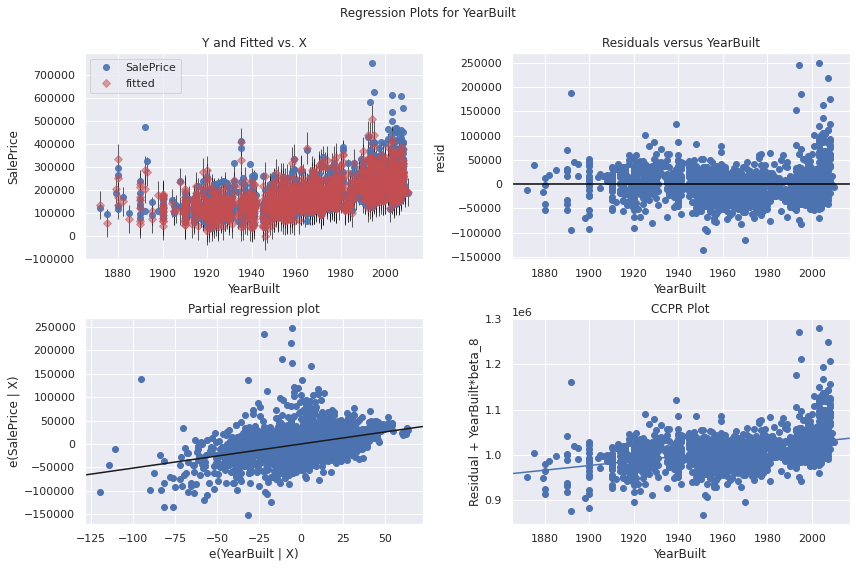

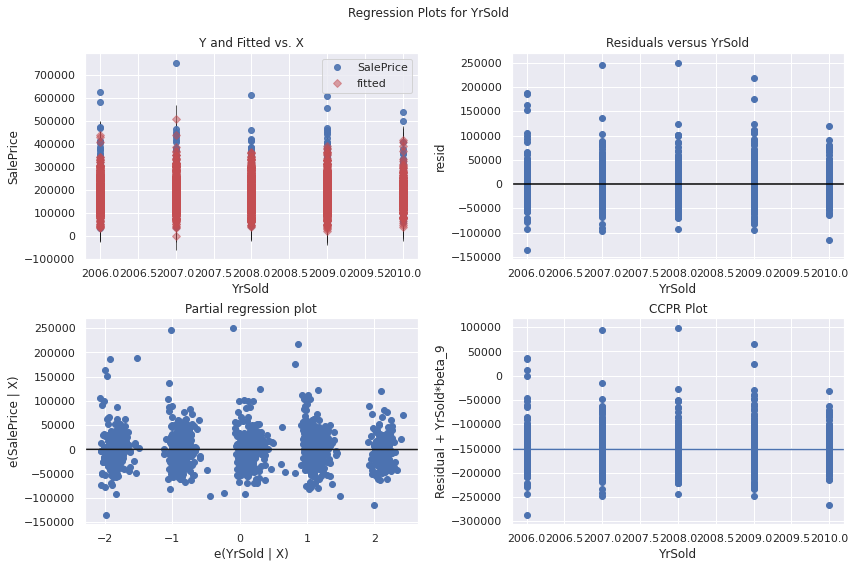

In [ ]:
for column in df_n.columns:
    if column != 'SalePrice':
        fig = plt.figure(figsize=(12,8))
        fig = sm.graphics.plot_regress_exog(model, column, fig=fig)

Text(0, 0.5, 'Actual Values')

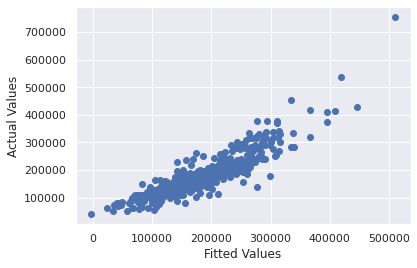

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel("Fitted Values")
plt.ylabel("Actual Values")

From the residual plot, 
* we can see we underestimated values that are actually very expensive.
* the other values line up very close to each other, meaning that our model is pretty good at predicting sale prices for most houses, in the mid and lower range.

Text(0, 0.5, 'Actual Values')

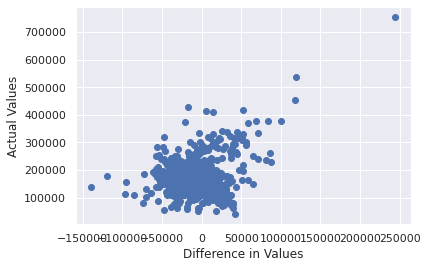

In [ ]:
plt.scatter(y_test - y_pred, y_test)
plt.xlabel("Difference in Values")
plt.ylabel("Actual Values")

R^2 value: 0.8058875324251069

In [ ]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

nn = KNeighborsRegressor(n_neighbors=20)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 25255.849334442595
MSE: 1721194864.452608
RMSE: 41487.28557585574
R-Squared: 0.6518649927812195


Text(0, 0.5, 'Actual Values')

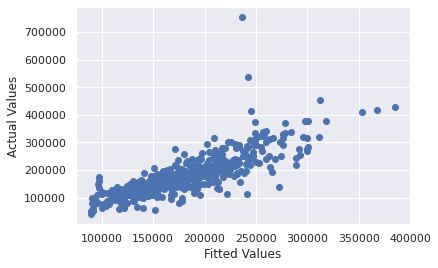

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel("Fitted Values")
plt.ylabel("Actual Values")

Text(0, 0.5, 'Actual Values')

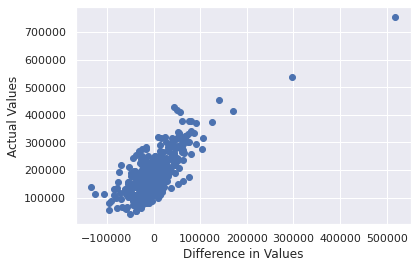

In [ ]:
plt.scatter(y_test - y_pred, y_test)
plt.xlabel("Difference in Values")
plt.ylabel("Actual Values")

* For the residual plot (difference in values) of the multiple linear regressor, the difference is mostly populated around zero, with lesser variance than the residual plot of KNN regressor.
* The residual plot of the actual and fitted values also have very high variance for KNN regressor, where KNN vastly underestimated or overestimated some values.

R^2 Value: 0.6518649927812195

The R^2 performance metric for KNN Regressor is much lesser than that of the Linear Regression model.

### Question 8
#### Titanic

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck', 'class']
df = titanic.drop(columns, axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [ ]:
df.fillna({'age': df['age'].mode()[0]}, inplace=True)
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [ ]:
df['embarked'].mode()[0]

'S'

In [ ]:
df.fillna({'embarked': df['embarked'].mode()[0]}, inplace=True)
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
df['sex'] = lencoder.fit_transform(df['sex'])
df['embarked'] = lencoder.fit_transform(df['embarked'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X.shape

(891, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.8022388059701493

In [ ]:
metrics.confusion_matrix(y_pred, y_test)

array([[140,  25],
       [ 28,  75]])